In [229]:
import os
from nltk.tokenize import WordPunctTokenizer
import time
import re
from collections import Counter
import matplotlib.pyplot as plt

In [19]:
PATH_TO_CORPUS="H:\\IR LAB\\classics\\"
filenames = os.listdir(PATH_TO_CORPUS)
filenames


['black-beauty.txt',
 'classics.zip',
 'coral-island.txt',
 'great expectations.txt',
 'gullivers-travels.txt',
 'hucleberry-finn.txt',
 'jane-eyre.txt',
 'kidnapped.txt',
 'little-women.txt',
 'oliver-twist.txt',
 'robinson-crusoe.txt',
 'swiss family robinson.txt',
 'treasure-island.txt']

#### 1. Read in the Classic corpus into a list, where each text should be an entry into the list. Roughly how long does it take to read in the entire corpus. You can answer in absolute time.

In [32]:
all = []

start = time.time()
for data in filenames:
    try:
        alltext = open(PATH_TO_CORPUS+data,"r").read()
        all.append(alltext)
    except:
        print("read character encoding error")
end = time.time()
print("time : ", (end - start)*1000, " ms ")

read character encoding error
read character encoding error
read character encoding error
time :  71.9766616821289  ms 


#### 2. Repeat the process using the bbc dataset. However, files inside the folders need to be added to the same list. How long did it take to read the dataset?

In [33]:
path_to_bbc = "H:\\IR LAB\\bbc\\"

start = time.time()
bbc = []
ans = 0
subfolder_names = os.listdir(path_to_bbc)
for subfolder in subfolder_names:
    if os.path.isdir(path_to_bbc + subfolder):
        textfiles = os.listdir(path_to_bbc + subfolder +"\\")
        for data in textfiles:
            #print(path_to_bbc + subfolder + "\\" + data)
            try:
                alltext_1 = open(path_to_bbc + subfolder + "\\" + data,"r",encoding="utf-8").read()
                all.append(alltext_1)
                ans = ans + 1
                bbc.append(alltext_1)
            except:
                print("error")
            
end = time.time()
print("time : ", (end - start)*1000, " ms ")  

error
time :  1543.5969829559326  ms 


#### 3. Use the bbc dataset for this problem. How many raw tokens can you identify? A raw token is obtained by segmenting on a blank space. Any punctuations are retained. Multiple consecutive white spaces are to be collapsed into a single white space.

In [167]:
tokens = []
for file in bbc:
    text = re.sub(r'\s+', ' ', file)
    tokens.extend(text.split(" "))

print("Count of Token : ", len(tokens))

Count of Token :  856271


#### 4. Produce a list of better quality tokens for the documents in the bbc dataset. The tokens are now defined as follows:

#### ”A Token is a collection of alphabets and/or digits with a (optional) single instance of an apostrophe or a hyphen.”

In [168]:
pattern = re.compile(r"^\w*[-']?\w*$")
better_tokens = list(filter(pattern.match, tokens))
better_tokens

['Ad',
 'sales',
 'boost',
 'Time',
 'Warner',
 'profit',
 'Quarterly',
 'profits',
 'at',
 'US',
 'media',
 'giant',
 'TimeWarner',
 'jumped',
 'to',
 'for',
 'the',
 'three',
 'months',
 'to',
 'from',
 'The',
 'which',
 'is',
 'now',
 'one',
 'of',
 'the',
 'biggest',
 'investors',
 'in',
 'benefited',
 'from',
 'sales',
 'of',
 'high-speed',
 'internet',
 'connections',
 'and',
 'higher',
 'advert',
 'TimeWarner',
 'said',
 'fourth',
 'quarter',
 'sales',
 'rose',
 'to',
 'from',
 'Its',
 'profits',
 'were',
 'buoyed',
 'by',
 'one-off',
 'gains',
 'which',
 'offset',
 'a',
 'profit',
 'dip',
 'at',
 'Warner',
 'and',
 'less',
 'users',
 'for',
 'Time',
 'Warner',
 'said',
 'on',
 'Friday',
 'that',
 'it',
 'now',
 'owns',
 'of',
 'search-engine',
 'But',
 'its',
 'own',
 'internet',
 'had',
 'has',
 'mixed',
 'It',
 'lost',
 'subscribers',
 'in',
 'the',
 'fourth',
 'quarter',
 'profits',
 'were',
 'lower',
 'than',
 'in',
 'the',
 'preceding',
 'three',
 'the',
 'company',
 'said

#### 5. Create a vocabulary for the bbc dataset containing the tokens found in the last exercise.

In [176]:
bbc_vocab  = set(better_tokens)
bbc_vocab = list(bbc_vocab)

#### 6. Write a program that accepts a token and plots a bar graph showing the top 20 documents where the token is present. Top 20 here is defined as per frequency of occurrence

In [236]:
path_to_bbc = "H:\\IR LAB\\bbc\\"

token_freq = {}
subfolder_names = os.listdir(path_to_bbc)
for subfolder in subfolder_names:
    if os.path.isdir(path_to_bbc + subfolder):
        textfiles = os.listdir(path_to_bbc + subfolder +"\\")
        for data in textfiles:
            #print(path_to_bbc + subfolder + "\\" + data)
            try:
                file_text = open(path_to_bbc + subfolder + "\\" + data,"r",encoding="utf-8").read()
                text = re.sub(r'\s+', ' ', file_text)
                token_list = text.split(" ")
                token_list = [ele.lower() for ele in token_list]
                token_freq[subfolder + "/" + data] = Counter(token_list)
            except:
                print("error")
            

error


{'business/181.txt': 7, 'business/054.txt': 5, 'business/130.txt': 5, 'business/380.txt': 5, 'business/399.txt': 4, 'business/420.txt': 4, 'politics/139.txt': 4, 'tech/192.txt': 4, 'business/008.txt': 3, 'business/159.txt': 3, 'business/434.txt': 3, 'business/019.txt': 2, 'business/068.txt': 2, 'business/276.txt': 2, 'business/307.txt': 2, 'business/345.txt': 2, 'business/347.txt': 2, 'business/491.txt': 2, 'entertainment/061.txt': 2, 'entertainment/349.txt': 2, 'business/018.txt': 1, 'business/020.txt': 1, 'business/146.txt': 1, 'business/186.txt': 1, 'business/261.txt': 1, 'business/296.txt': 1, 'business/325.txt': 1, 'business/346.txt': 1, 'business/379.txt': 1, 'business/428.txt': 1, 'business/485.txt': 1, 'business/486.txt': 1, 'business/503.txt': 1, 'entertainment/054.txt': 1, 'entertainment/085.txt': 1, 'entertainment/289.txt': 1, 'politics/025.txt': 1, 'politics/191.txt': 1, 'politics/380.txt': 1, 'sport/430.txt': 1, 'sport/436.txt': 1, 'tech/023.txt': 1, 'tech/106.txt': 1, 'te

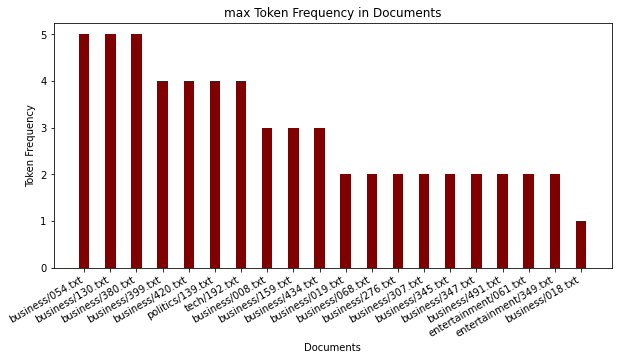

In [237]:
user_token = "India"
user_token = user_token.lower()

doc_freq = {}
for key, val in token_freq.items():
    for k,v in val.items():
        if(k == user_token):
            doc_freq[key] = v

sorted_freq = sorted(doc_freq.items(), key=lambda x:x[1], reverse=True)
sorted_freq = dict(sorted_freq)
# print(sorted_freq)

docs = list(sorted_freq.keys())
tfreq = list(sorted_freq.values())

if(len(sorted_freq) > 20):
    docs = docs[1:21]
    tfreq = tfreq[1:21]

fig = plt.figure(figsize = (10, 5))
plt.bar(docs, tfreq, color ='maroon',
        width = 0.4)
fig.autofmt_xdate()
plt.xlabel("Documents")
plt.ylabel("Token Frequency")
plt.title("max Token Frequency in Documents")
plt.show()

In [241]:
len_vocab = [len(ele) for ele in bbc_vocab]
len_vocab

n = len(len_vocab)
Range = max(len_vocab) – min(len_vocab)
Number_of_intervals =  math.sqrt(n) 
Width_of_intervals =  Range/(Number_of_intervals)

bins = [i for in range(0,max(len_vocab)+1,Width_of_intervals)]
bins

SyntaxError: invalid character '–' (U+2013) (Temp/ipykernel_8724/3540251743.py, line 5)

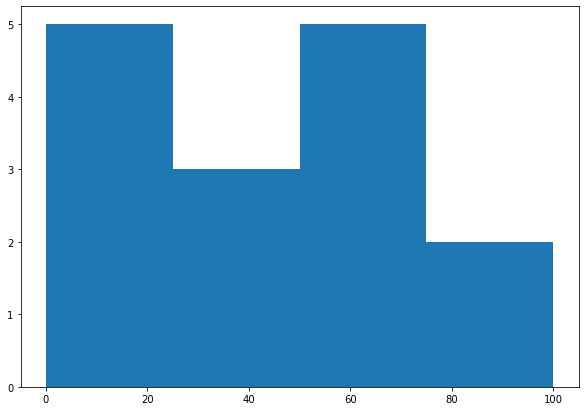

In [239]:
# bbc_vocab
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
a = np.array([22, 87, 5, 43, 56,
              73, 55, 54, 11,
              20, 51, 5, 79, 31,
              27])
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 25, 50, 75, 100])
 
# Show plot
plt.show()